<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S7_C2_Norm_Scal_Std_Inicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer


# Pretratamiento de los datos

es un pretratamiento o un preprosesamiento de los datos para **REDES NEURONALES**

* Donde **agrupan** los datos que se hallan en **diferentes rangos** en un rango
* Los agrupa en **una misma escala**
* Es algo asi como un **""promedio"** que se lleva a cabo en cada **columna** de la **misma fila**
* Se hace el **pretratamiento** para **comprimir** y hacer **mas fácil el trabajo** de redes deuronales y otros procedimientos mas adelante

# Generar datos para el laboratorio

Datos originales:
     Feature_1  Feature_2   Feature_3
0          52        391  198.777241
1          93        476  217.777566
2          15        360  220.850555
3          72        659  241.623093
4          61        513  185.330043
5          21        221  198.508072
6          83        452  204.756289
7          87        947  233.232717
8          75        760  192.989075
9          75        674  198.340330
10         88        258  162.546174
11         24        710  161.080900
12          3        881  247.442143
13         22        675  279.042529
14         53        899  181.591453
15          2        982  218.778232
16         88        389  140.342089
17         30        886  179.547405
18         38        762  177.662926
19          2        766  276.212082


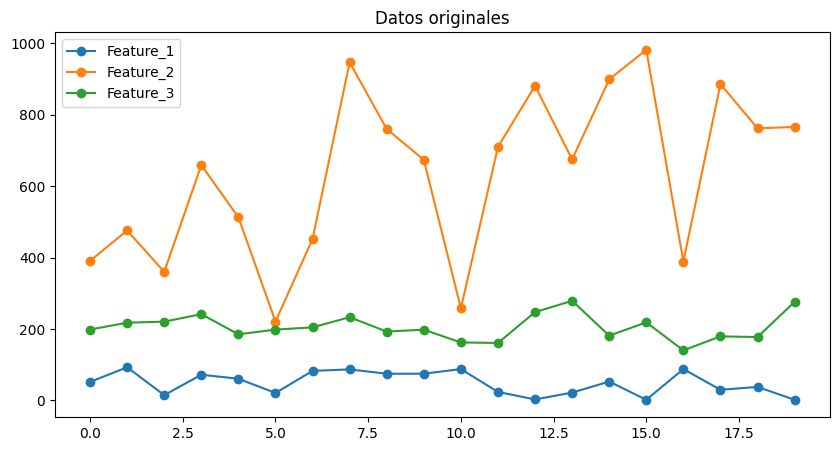

In [12]:
# Generar datos de ejemplo
np.random.seed(42)
data = {
    "Feature_1": np.random.randint(1, 100, 20),
    "Feature_2": np.random.randint(200, 1000, 20),
    "Feature_3": np.random.randn(20) * 50 + 200  # datos con media alta y varianza
}
df = pd.DataFrame(data)
print("Datos originales:\n", df)

# Graficar los datos originales para visualizar la escala
plt.figure(figsize=(10, 5))
plt.title("Datos originales")
plt.plot(df, marker='o')
plt.legend(df.columns)
plt.show()

In [13]:
import sys # proporciona acceso a variables y funciones del sistema en Python.
print(sys.version) # sys.version, obtienes la versión de Python que estás utilizando

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


<Axes: title={'center': 'Datos originales'}, xlabel='Feature_1', ylabel='Count'>

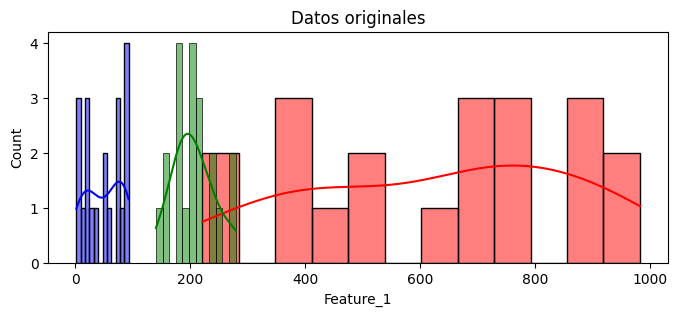

In [14]:
plt.figure(figsize=(8, 3))
plt.title("Datos originales")
sns.histplot(df['Feature_1'], kde=True, bins=12, color='blue', label='Feature_1', alpha=0.5)
sns.histplot(df['Feature_2'], kde=True, bins=12, color='red', label='Feature_2', alpha=0.5)
sns.histplot(df['Feature_3'], kde=True, bins=12, color='green', label='Feature_3', alpha=0.5)


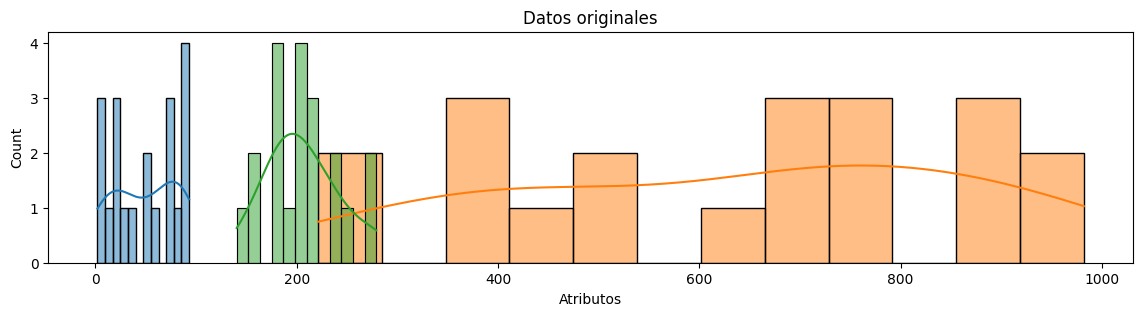

In [15]:
from pickle import NONE
plt.figure(figsize=(14, 3))
for col in df.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df[col],kde=True, bins=12, alpha=0.5)

plt.title("Datos originales")
plt.xlabel("Atributos")
plt.show()

Es sabido que cada atributo corresponde a un vector donde el valor es determinado fila por fila, asi que hay varias cosas a considerar:
* las columnas por su naturaleza en un dataframe nunca tienen valores an rangos similares
* al graficarlas se evidencia la complejidad del tamaño y en algunos casos algunas columnas en la grafica pierden relevancia
* en algunos casos por la naturaleza de los datos dentro de las columnas las predicciones pueden llevar mas tiempo en llevarse a cabo

# PARTE 2. Escalamiento

*   MinMaxScales

*   MinAbsScales



## **MinMaxScale**
Al ejecutar **df.describe()** podemos encontrar el **min** y el **max**, alli es donde la funcion **MinMaxScale** toma los límites
* **min** : es el valor mas bajo que aparece en los datos incluido los negativos
* **max** :  es el valor mas alto que aparece en os datos
* Se realiza una **Regla de 3** tomando como **base el min y max** para hacer una **escala de los datos** en un determinado **rago (entre 0 y 1)**
* Con feature_range=(min, max) puedes asignar los datos del rango

In [16]:
min_max_scaler = MinMaxScaler()
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
print("Datos escalados con MinMaxScaler")
#print(df_min_max)

Datos escalados con MinMaxScaler


## **MaxAbsScaler**

es util cuando quieres **preservar el signo** de los datos:
* si los datos son todos positivos, la escala es de (0,1)
* si hay datos que tienen negativos la escala es(-1,1)


In [17]:
max_abs_scaler = MaxAbsScaler()
df_max_abs = pd.DataFrame(max_abs_scaler.fit_transform(df), columns=df.columns)
print("Datos escalados con MaxAbsScaler")
#print(df_max_abs)


Datos escalados con MaxAbsScaler


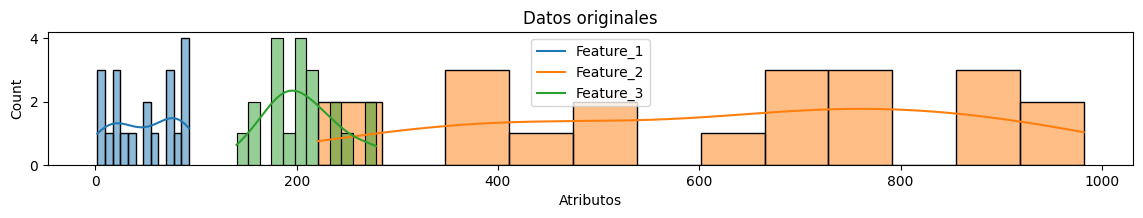

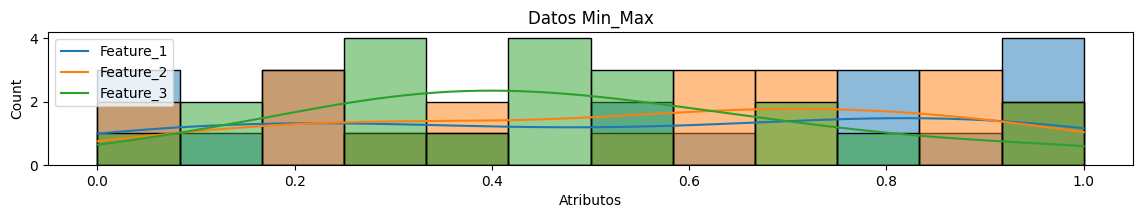

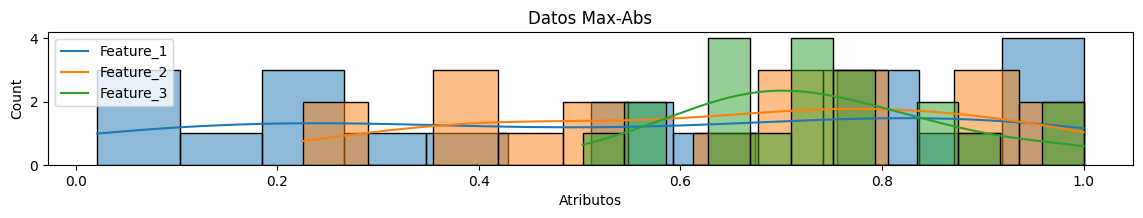

In [18]:


# Datos originales
plt.figure(figsize=(14, 10))
df_graf = df
plt.subplot(5,1,1)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos originales")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

# Daos Escalados con MinMaxScaler
plt.figure(figsize=(14, 10))
df_graf = df_min_max
plt.subplot(5,1,2)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos Min_Max")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

# Datos Escalados MaxAbsScaler
plt.figure(figsize=(14, 10))
df_graf = df_max_abs
plt.subplot(5,1,3)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos Max-Abs")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

# PARTE 3. Normalización
* Normalizacion **l1**
* Normalizacion **l2** cada dato de **l1** al "cuadrado"

## **Normalizacion l1**
de las **FILAS** convierte los datos en **vectores** cuya **suma** de valores absolutos es igual a **1**
* toma los datos y **"proporciona"** los datos de cada fila y los **reasigna** (escala)
* la **suma** de todas las filas es igual a **1**
* Útil para **mantener** la **estructura** de los datos


In [19]:
norma_l1 = Normalizer(norm='l1')
df_norm_l1 = pd.DataFrame(norma_l1.fit_transform(df), columns=df.columns)
print("Datos normalizados con norma l1")
print(df_norm_l1)


Datos normalizados con norma l1
    Feature_1  Feature_2  Feature_3
0    0.081025   0.609246   0.309729
1    0.118204   0.604999   0.276797
2    0.025174   0.604178   0.370648
3    0.074027   0.677549   0.248424
4    0.080334   0.675596   0.244070
5    0.047672   0.501693   0.450634
6    0.112199   0.611012   0.276789
7    0.068654   0.747298   0.184049
8    0.072958   0.739307   0.187735
9    0.079169   0.711466   0.209365
10   0.173042   0.507329   0.319629
11   0.026813   0.793224   0.179962
12   0.002651   0.778652   0.218696
13   0.022540   0.691568   0.285892
14   0.046754   0.793055   0.160191
15   0.001663   0.816443   0.181894
16   0.142547   0.630121   0.227333
17   0.027384   0.808728   0.163888
18   0.038868   0.779410   0.181722
19   0.001915   0.733567   0.264517


In [20]:
df_norm_l1['Feature_1'].sum()

1.2435927686278687

In [21]:
sumarFila=df_norm_l1.loc[1].sum()
sumarFila

1.0

## **Normalización L2**
transforma cada muestra (o fila) en un **vector unitario**, de modo que la **suma de los cuadrados** de sus valores sea **igual a 1**

* útil en contextos donde la **magnitud de las características importa**
* Para **mantener las relaciones geométricas** de los datos (por ejemplo, en modelos de clasificación y procesamiento de texto).
* Tomas los dato de Normalización l1 y los eleva a la 2 (Columna)**2
* Es independiente de Normalización L1

In [22]:
norma_l2 = Normalizer(norm='l2')
df_norm_l2 = pd.DataFrame(norma_l2.fit_transform(df), columns=df.columns)
print("Datos normalizados con norma l2")
print(df_norm_l2)

Datos normalizados con norma l2
    Feature_1  Feature_2  Feature_3
0    0.117727   0.885220   0.450029
1    0.174927   0.895325   0.409626
2    0.035494   0.851847   0.522586
3    0.102043   0.933980   0.342445
4    0.111141   0.934680   0.337669
5    0.070516   0.742098   0.666572
6    0.164974   0.898415   0.406982
7    0.088851   0.967145   0.238194
8    0.095214   0.964835   0.245004
9    0.106147   0.953905   0.280709
10   0.277271   0.812909   0.512152
11   0.032947   0.974687   0.221132
12   0.003278   0.962742   0.270401
13   0.030107   0.923727   0.381866
14   0.057691   0.978571   0.197664
15   0.001988   0.976068   0.217457
16   0.208136   0.920054   0.331934
17   0.033167   0.979539   0.198503
18   0.048509   0.972733   0.226796
19   0.002456   0.940708   0.339210


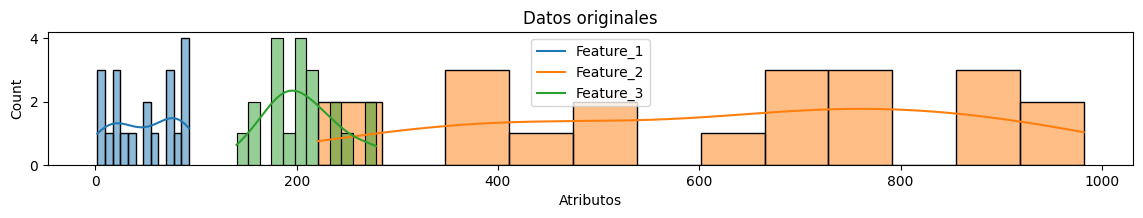

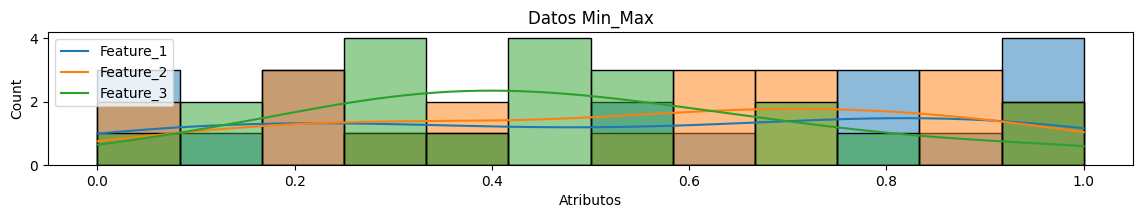

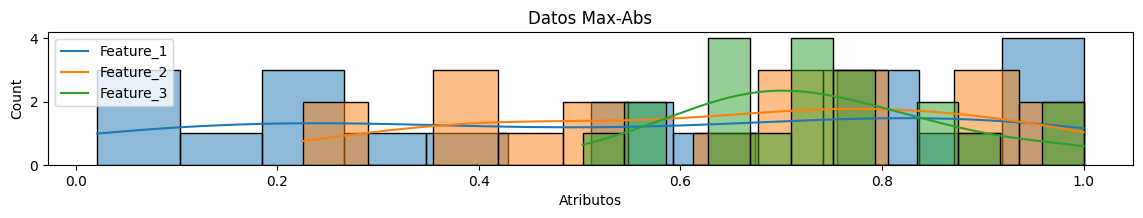

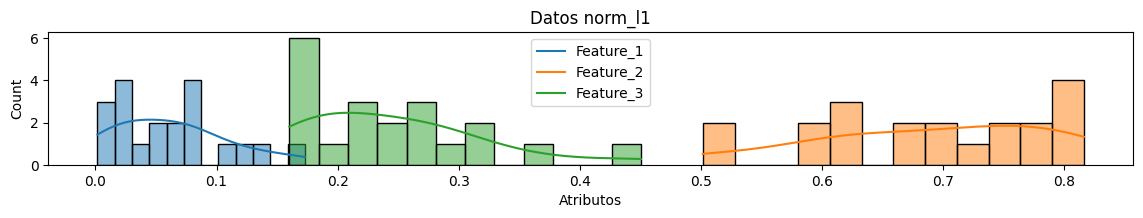

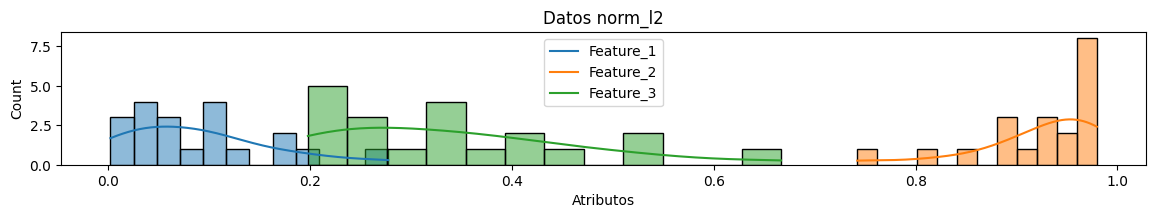

In [23]:
# Datos originales
plt.figure(figsize=(14, 10))
df_graf = df
plt.subplot(5,1,1)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos originales")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

# Datos Escalados con MinMaxScaler
plt.figure(figsize=(14, 10))
df_graf = df_min_max
plt.subplot(5,1,2)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos Min_Max")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

# Datos Escalados MaxAbsScaler
plt.figure(figsize=(14, 10))
df_graf = df_max_abs
plt.subplot(5,1,3)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos Max-Abs")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

# Datos Escalados con Normalización l1
plt.figure(figsize=(14, 10))
df_graf = df_norm_l1
plt.subplot(5,1,4)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos norm_l1")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

# Datos Escalados con Normalización l2
plt.figure(figsize=(14, 10))
df_graf = df_norm_l2
plt.subplot(5,1,5)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos norm_l2")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

In [24]:
df.describe()

,Feature_1,Feature_2,Feature_3
count,20.000000,20.000000,20.000000
mean,49.200000,633.050000,205.821546
std,32.393307,235.303046,36.703216
min,2.000000,221.000000,140.342089
25%,21.750000,436.750000,181.080441
50%,52.500000,674.500000,198.642656
75%,77.000000,794.750000,223.946096
max,93.000000,982.000000,279.042529


# Parte 4. [Estandarización](https://scikit-learn.org/1.1/auto_examples/preprocessing/plot_scaling_importance.html#:~:text=Feature%20scaling%20through%20standardization%20(or,a%20standard%20deviation%20of%20one.)

* StandardScaler
* RobustScaler

## **StandardScaler**

Se usa para estandarizar los datos, llevándolos a una **distribución con media 0 **y desviación estándar
Me genera un dato a partir de restarle al dato evaluado la media(min) y dividirla por la desviación(std)
* **((x) - min) / std**
* centra los datos en un **"plano cartesiano"**
* el **rango** puede variar segun la **distribucion** de los datos, es decir aumenta por los **outliers**

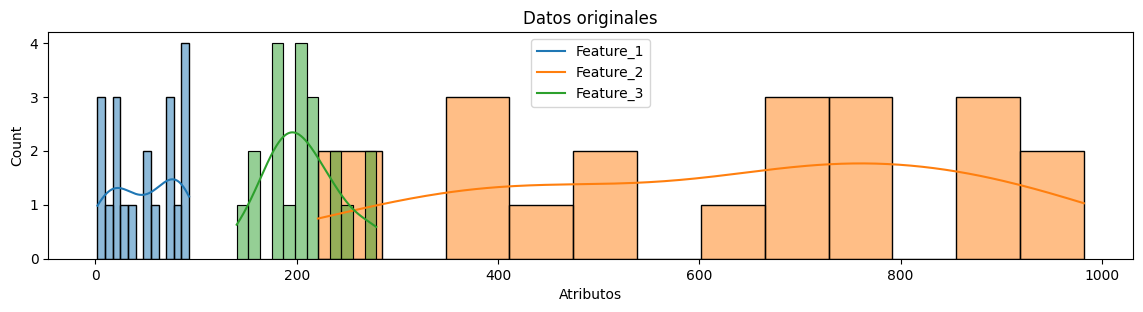

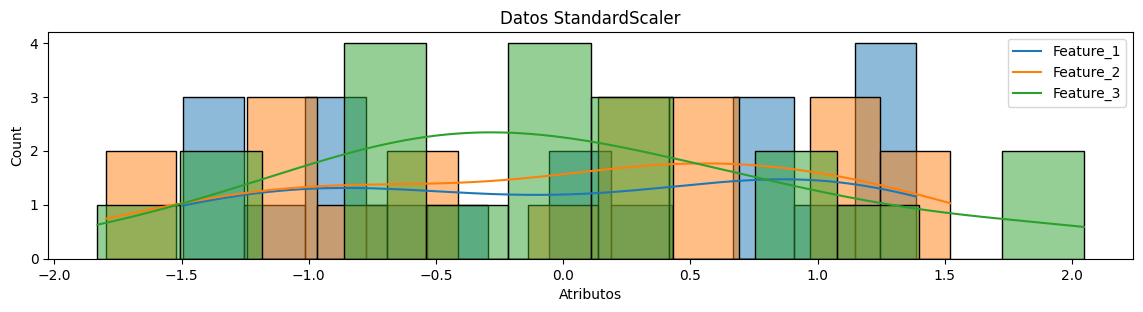

In [26]:
# Datos originales
plt.figure(figsize=(14, 10))
df_graf = df
plt.subplot(3,1,1)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos originales")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

# Datos Escalados con StandardScaler
plt.figure(figsize=(14, 10))
df_graf = df_standar
plt.subplot(3,1,2)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos StandardScaler")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()


In [25]:
standar_scaler = StandardScaler()
df_standar = pd.DataFrame(standar_scaler.fit_transform(df), columns=df.columns)
print("Datos escalados con StandardScaler")
print(df_standar)

Datos escalados con StandardScaler
    Feature_1  Feature_2  Feature_3
0    0.088683  -1.055397  -0.196912
1    1.387257  -0.684776   0.334211
2   -1.083201  -1.190564   0.420111
3    0.722134   0.113148   1.000774
4    0.373736  -0.523447  -0.572806
5   -0.893166  -1.796638  -0.204436
6    1.070532  -0.789422  -0.029778
7    1.197222   1.368898   0.766234
8    0.817152   0.553533  -0.358711
9    0.817152   0.178552  -0.209125
10   1.228895  -1.635309  -1.209692
11  -0.798148   0.335521  -1.250652
12  -1.463271   1.081122   1.163436
13  -0.861493   0.182912   2.046773
14   0.120356   1.159607  -0.677313
15  -1.494944   1.521507   0.362183
16   1.228895  -1.064117  -1.830371
17  -0.608113   1.102923  -0.734451
18  -0.354732   0.562253  -0.787128
19  -1.494944   0.579694   1.967652


## **RobustScaler**

transforma los datos usando estadísticas **robustas (mediana y rango intercuartílico)** en lugar de la media y la desviación estándar, lo que lo hace menos sensible a valores atípicos.

* Ajusta los datos para que estén **centrados** en torno a la **mediana** de los datos
* El rango **intercuartílico** (la diferencia entre el percentil 75 y el percentil 25) de la característica. **(IQR)**
* ideal cuando deseas **reducir** el impacto de valores **atípicos (outliers)**

In [27]:
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
print("Datos escalados con RobustScaler")
print(df_robust)

Datos escalados con RobustScaler
    Feature_1  Feature_2  Feature_3
0   -0.009050  -0.791899   0.003140
1    0.733032  -0.554469   0.446393
2   -0.678733  -0.878492   0.518081
3    0.352941  -0.043296   1.002678
4    0.153846  -0.451117  -0.310566
5   -0.570136  -1.266760  -0.003140
6    0.552036  -0.621508   0.142623
7    0.624434   0.761173   0.806941
8    0.407240   0.238827  -0.131891
9    0.407240  -0.001397  -0.007053
10   0.642534  -1.163408  -0.842084
11  -0.515837   0.099162  -0.876267
12  -0.895928   0.576816   1.138429
13  -0.552036   0.001397   1.875625
14   0.009050   0.627095  -0.397782
15  -0.914027   0.858939   0.469737
16   0.642534  -0.797486  -1.360076
17  -0.407240   0.590782  -0.445467
18  -0.262443   0.244413  -0.489430
19  -0.914027   0.255587   1.809594


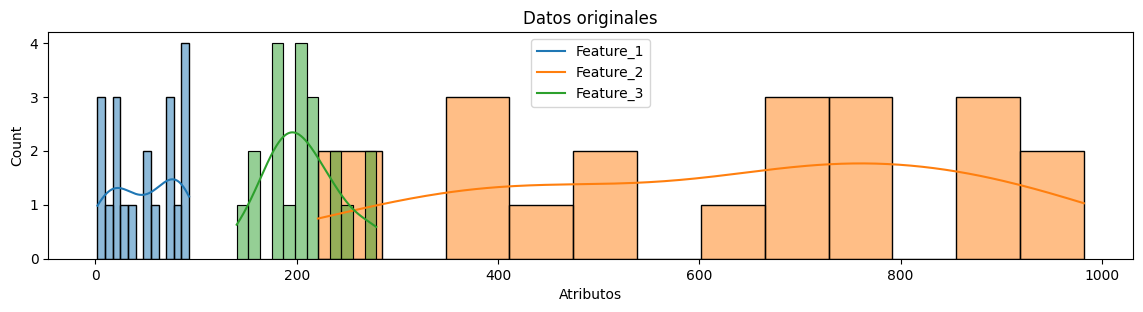

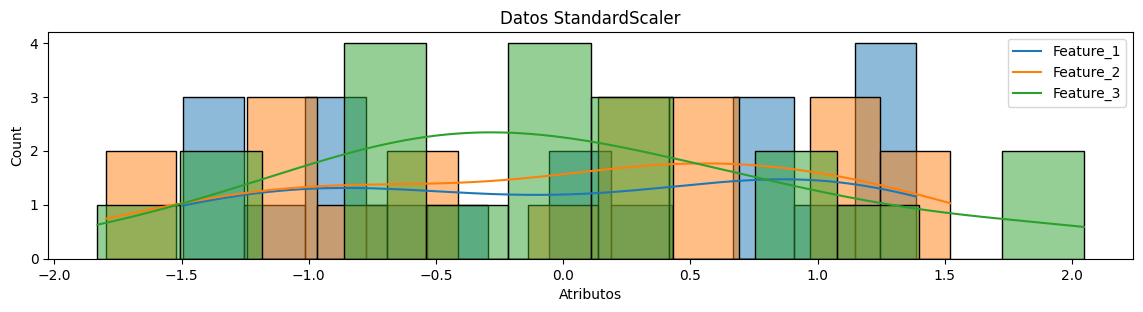

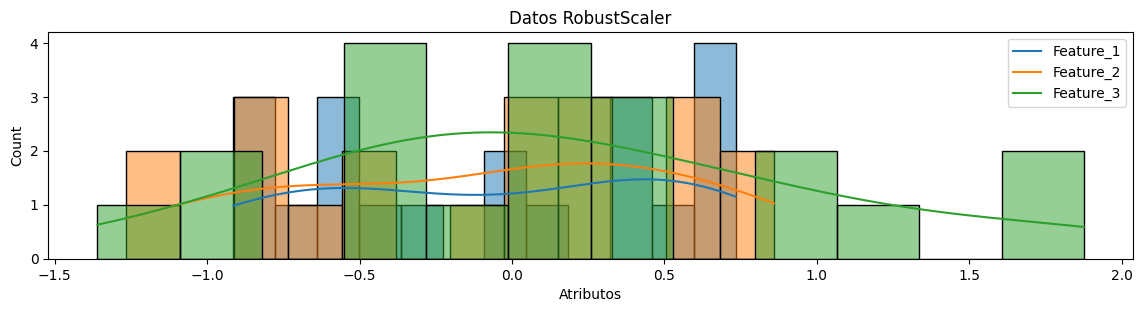

In [28]:
# Datos originales
plt.figure(figsize=(14, 10))
df_graf = df
plt.subplot(3,1,1)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos originales")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

# Datos Escalados con StandardScaler
plt.figure(figsize=(14, 10))
df_graf = df_standar
plt.subplot(3,1,2)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos StandardScaler")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

#Datos
# Datos Escalados con RobustScaler
plt.figure(figsize=(14, 10))
df_graf = df_robust
plt.subplot(3,1,2)
for col in df_graf.columns: # col toma los valores de cada característica en columnas
  sns.histplot(df_graf[col], kde=True, bins=12, alpha=0.5)

plt.title("Datos RobustScaler")
plt.xlabel("Atributos")
plt.legend(df_graf.columns)
plt.show()

